Project 2 - Crate & Berrel 
--
Samantha M. Lord


Otto Group Product Classification Challange with Kaggle 

In [17]:
import pandas as pd

train = pd.read_csv("train.csv", index_col = 0)
train

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9


In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [19]:
ctr=train["target"].value_counts()
ctr

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

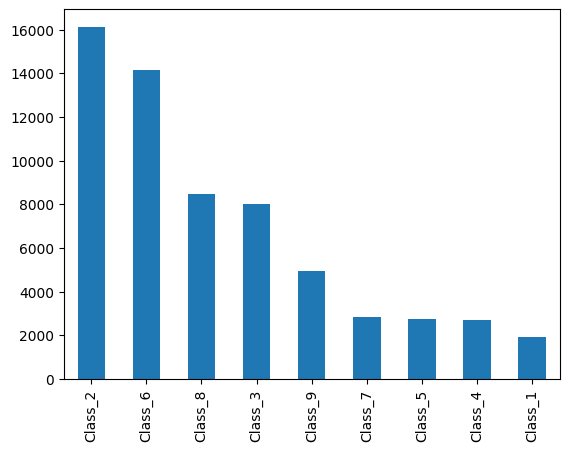

In [20]:
import matplotlib.pyplot as plt
ctr.plot(kind="bar")
plt.show()

In [21]:
train.shape

(61878, 94)

In [22]:
X=train.drop("target",axis=1)
y=train["target"]

In [23]:
le = LabelEncoder()
le_y = le.fit_transform(y)
logreg=LogisticRegression(multi_class='auto')
logreg.fit(X,le_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
import pandas as pd

test = pd.read_csv("test.csv",  index_col = 0)
test

y_pred_prob=logreg.predict_proba(test)
pd_pre_prob=pd.DataFrame(y_pred_prob,columns=list(le.classes_))
pd_pre_prob

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,7.173123e-06,1.547568e-01,2.308393e-01,6.101545e-01,8.665241e-14,6.485298e-06,4.235598e-03,2.087923e-07,8.289722e-09
1,9.671561e-04,1.524466e-05,8.944418e-08,1.384590e-08,1.040615e-07,7.021353e-01,1.167263e-04,2.956025e-01,1.162891e-03
2,1.791832e-06,9.859168e-08,2.600376e-08,7.622445e-10,1.047403e-09,9.998512e-01,8.062939e-05,6.579810e-05,4.321654e-07
3,2.507929e-10,7.054741e-01,2.875434e-01,6.982262e-03,3.192955e-09,6.923607e-09,6.117294e-08,1.776167e-09,1.415408e-07
4,6.738376e-01,4.416671e-07,1.621855e-07,1.148540e-09,8.015382e-11,4.202979e-03,1.089662e-03,4.420988e-02,2.766593e-01
...,...,...,...,...,...,...,...,...,...
144363,2.648479e-01,1.223754e-02,2.872340e-03,2.595149e-03,9.371955e-06,3.145951e-01,2.241221e-01,6.365408e-02,1.150664e-01
144364,2.901184e-03,3.474019e-01,3.560293e-01,1.798788e-01,1.029047e-06,2.064139e-03,1.113842e-01,2.656190e-04,7.384261e-05
144365,9.076967e-15,2.408016e-01,5.368294e-01,2.209079e-01,2.009069e-18,1.130039e-07,1.460982e-03,8.640316e-12,3.258389e-13
144366,5.041709e-06,7.426136e-01,1.307976e-01,1.258388e-01,9.202009e-06,2.029080e-05,6.735350e-04,3.234304e-05,9.563716e-06


In [25]:
import pandas as pd

submit = pd.read_csv("sampleSubmission.csv")
submit

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
144363,144364,1,0,0,0,0,0,0,0,0
144364,144365,1,0,0,0,0,0,0,0,0
144365,144366,1,0,0,0,0,0,0,0,0
144366,144367,1,0,0,0,0,0,0,0,0


In [26]:
submission=pd.concat([submit['id'],pd_pre_prob],axis=1)
submission.to_csv("submission_1.csv",index=False)

In [27]:
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
gb.fit(X,le_y)
y_pred_prob1=gb.predict_proba(test)
y_pred_prob1

array([[1.62061273e-147, 7.67095997e-011, 2.75264563e-006, ...,
        2.56627017e-035, 6.47404434e-242, 9.72978070e-240],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.33013834e-213, 3.66080449e-004, 0.00000000e+000],
       [5.71204064e-295, 0.00000000e+000, 0.00000000e+000, ...,
        1.38218709e-262, 9.61320456e-040, 5.38055572e-274],
       ...,
       [0.00000000e+000, 2.88618980e-031, 9.99996058e-001, ...,
        4.98141055e-020, 3.39924951e-154, 0.00000000e+000],
       [1.99302975e-058, 9.65274269e-001, 2.43714301e-007, ...,
        1.15949178e-038, 2.17304478e-078, 8.70958021e-044],
       [1.20395351e-050, 9.96537055e-001, 1.78105708e-003, ...,
        4.82130958e-031, 1.25388096e-079, 4.16484700e-051]])

In [28]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022, )
gb= GaussianNB()    
results = cross_val_score(gb, X, le_y ,scoring='neg_log_loss', cv = kfold)
print(results)
print(results.mean())

[-7.51286856 -7.44897659 -7.39099515 -7.62422652 -7.69403282]
-7.53421993007143


In [29]:
pd_pre_prob1=pd.DataFrame(y_pred_prob1,columns=list(le.classes_))
pd_pre_prob1

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1.620613e-147,7.670960e-11,2.752646e-06,9.999972e-01,0.000000e+00,1.833379e-280,2.566270e-35,6.474044e-242,9.729781e-240
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.996339e-01,1.330138e-213,3.660804e-04,0.000000e+00
2,5.712041e-295,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.382187e-262,9.613205e-40,5.380556e-274
3,1.231444e-272,1.000000e+00,2.192188e-10,6.433092e-10,0.000000e+00,1.105587e-265,5.484370e-85,0.000000e+00,2.604258e-277
4,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.870001e-132,1.906576e-25,1.320758e-32,3.818611e-10
...,...,...,...,...,...,...,...,...,...
144363,3.074203e-05,7.357479e-65,5.794285e-47,7.338734e-61,1.096547e-159,7.249458e-12,3.608036e-09,3.688682e-22,9.999693e-01
144364,4.900090e-61,4.006456e-01,4.308495e-02,5.562695e-01,0.000000e+00,1.956246e-102,3.750720e-31,6.218092e-95,2.644114e-93
144365,0.000000e+00,2.886190e-31,9.999961e-01,3.942123e-06,0.000000e+00,8.905514e-182,4.981411e-20,3.399250e-154,0.000000e+00
144366,1.993030e-58,9.652743e-01,2.437143e-07,3.472549e-02,3.792563e-118,2.514118e-75,1.159492e-38,2.173045e-78,8.709580e-44


In [30]:
submission1=pd.concat([submit['id'],pd_pre_prob1],axis=1)
submission1.to_csv("submission_2.csv",index=False)

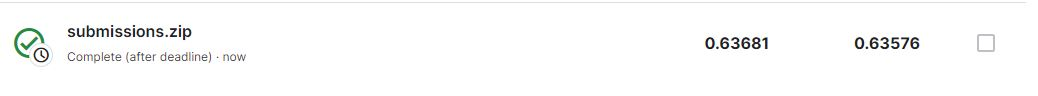